In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import statsmodels.api as sm
%matplotlib inline

### Dataset

In [59]:
data_df = pd.read_csv("SDD.csv")
data_df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


#### Number of unique participants

In [60]:
f = data_df.loc[data_df.gender == 0]
m = data_df.loc[data_df.gender == 1]
print('The total number of dates is: {}'.format(len(data_df)))
print('The total number of unique participants is: {}'.format(len(data_df['iid'].unique())))
print('The number of female participants is: {}'.format(len(f['iid'].unique())))
print('The number of male participants is: {}'.format(len(m['iid'].unique())))

The total number of dates is: 8378
The total number of unique participants is: 551
The number of female participants is: 274
The number of male participants is: 277


#### Participant's age distribution

participant's age distribution


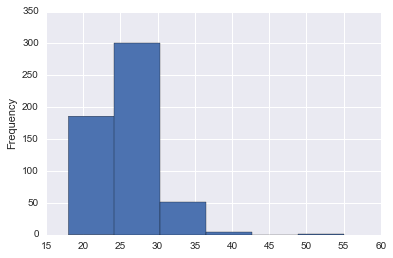

In [61]:
data_unique = data_df.groupby('iid').mean()
data_unique.age.plot(kind='hist', bins=6)
print("participant's age distribution")

Females age distribution


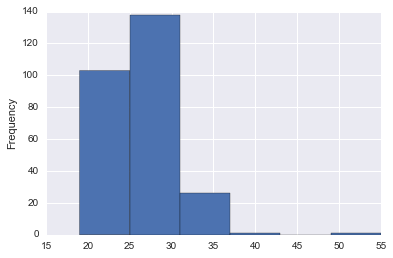

In [62]:
data_unique_f = data_df[data_df['gender']==0].groupby('iid').mean()
data_unique_f.age.plot(kind='hist', bins=6)
print("Females age distribution")

Males age distribution


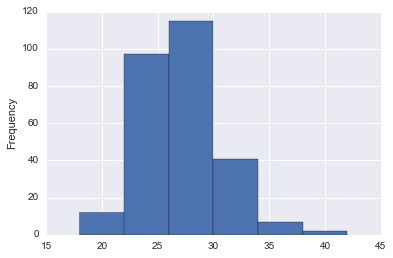

In [63]:
data_unique_m = data_df[data_df['gender']==1].groupby('iid').mean()
data_unique_m.age.plot(kind='hist', bins=6)
print("Males age distribution")

#### Participant's activities (Interest)

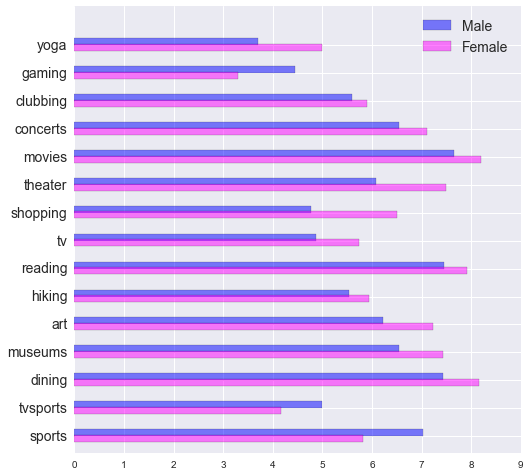

In [152]:
activities_interested=['sports','tvsports', 'dining', 'museums', 'art', 'hiking', 'reading', 'tv', 'shopping', 
                       'theater','movies', 'concerts', 'clubbing', 'gaming', 'yoga']
temp = data_df.groupby(['gender']).mean()[activities_interested].values

g = plt.figure(figsize=(8,8))
g = plt.barh(np.arange(0,2*temp.shape[1],2)+0.2,temp[1,:], height=0.5,color=[0,0,1],alpha=0.5,label='Male')
g = plt.barh(np.arange(0,2*temp.shape[1],2)-0.2,temp[0,:], height=0.5,color=[1,0,1],alpha=0.5,label='Female')
g = plt.yticks(np.arange(0,2*temp.shape[1],2)+0.2,activities_interested,fontsize=14)
g = plt.ylim(-1,2*temp.shape[1]+1)
g = plt.legend(loc=0,fontsize=14)

### Number of match per gender

The avg. dates per male is: 15.1407942238
The match percentage for males is : 20.2888324872
Female partner said yes 39.7366771615 percent of the times


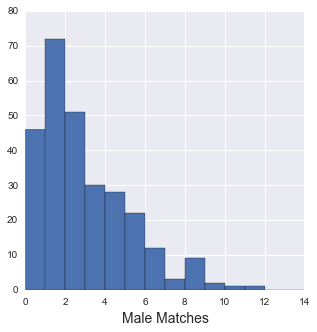

In [65]:
data_m = data_df[data_df['gender']==1].groupby('iid').sum()
match_m = data_m['match']
g = plt.figure(figsize=(5,5))
g = plt.hist(match_m, range(15))
g = plt.xlabel('Male Matches', fontsize=14) 

# Number of dates males
dates_male = data_df[data_df.gender == 1].groupby('iid').apply(len)

# The of matches males
matches_m = data_df[data_df.match == 1]
matches_male = matches_m[matches_m.gender == 1].groupby('iid').apply(len)

#Male match percentage
mmp = (matches_male / dates_male).mean() * 100.0
mmp
print('The avg. dates per male is: %s' %(dates_male.mean()))
print('The match percentage for males is : %s' % (mmp))

# Date? decision of partner == 1
partner_yes_M = data_df[data_df.dec_o == 1]
partner_syes_M = partner_yes_M[partner_yes_M.gender == 1].groupby('iid').apply(len)
pyp_M = ((partner_syes_M/dates_male).mean())*100
print('Female partner said yes %s percent of the times' % (pyp_M))


The avg. dates per female is: 15.2700729927
The match percentage for females is : 20.9103753144
Male partner said yes 48.6359814379 percent of the times


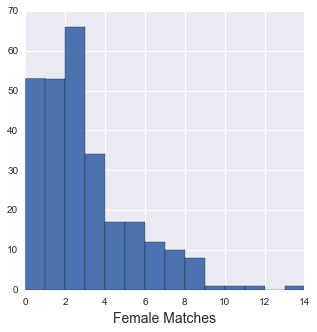

In [66]:
data_f = data_df[data_df['gender']==0].groupby('iid').sum()
match_f = data_f['match']
g = plt.figure(figsize=(5,5))
g = plt.hist(match_f, range(15))
g = plt.xlabel('Female Matches', fontsize=14) 

# Number of dates Females
dates_female = data_df[data_df.gender == 0].groupby('iid').apply(len)
# The of matches Females
matches = data_df[data_df.match == 1]
matches_female = matches[matches.gender == 0].groupby('iid').apply(len)
#Female match percentage
fmp = (matches_female / dates_female).mean() * 100.0
fmp
print('The avg. dates per female is: %s' %(dates_female.mean()))
print('The match percentage for females is : %s' % (fmp))

# Date? decision of partner == 1
partner_yes_F = data_df[data_df.dec_o == 1]
partner_syes_F = partner_yes_F[partner_yes_F.gender == 0].groupby('iid').apply(len)
pyp_F = ((partner_syes_F/dates_female).mean())*100
print('Male partner said yes %s percent of the times' % (pyp_F))

### Getting Dummies

In [67]:
dummy_gender = pd.get_dummies(data_df['gender'], prefix='gender')
print dummy_gender.head()

   gender_0  gender_1
0       1.0       0.0
1       1.0       0.0
2       1.0       0.0
3       1.0       0.0
4       1.0       0.0


### Columns to keep

In [153]:
cols_to_keep = ['dec_o', 'age' ,'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
data_b = data_df[cols_to_keep].join(dummy_gender.ix[:, 'gender':])
data_b.describe()

,dec_o,age,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,gender_0,gender_1
count,8378.000000,8283.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8378.000000,8378.000000
mean,0.419551,26.358928,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,0.499403,0.500597
std,0.493515,3.566763,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,0.500029,0.500029
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,0.000000,0.000000
50%,0.000000,26.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,0.000000,1.000000
75%,1.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,1.000000,1.000000
max,1.000000,55.000000,10.500000,10.000000,10.000000,11.000000,10.000000,10.000000,1.000000,1.000000


In [69]:
# intercept
data_b['intercept'] = 1.0
data_b.head()

,dec_o,age,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,gender_0,gender_1,intercept
0,0,21.0,6.0,8.0,8.0,8.0,8.0,6.0,1.0,0.0,1.0
1,0,21.0,7.0,8.0,10.0,7.0,7.0,5.0,1.0,0.0,1.0
2,1,21.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,1.0
3,1,21.0,7.0,8.0,9.0,8.0,9.0,8.0,1.0,0.0,1.0
4,1,21.0,8.0,7.0,9.0,6.0,9.0,7.0,1.0,0.0,1.0


### Droping data points with missing data

In [70]:
data_b.rename(columns={'dec_o': 'decision', 'attr_o': 'attractive', 'sinc_o' : 'sincere', 'intel_o' : 'intelligent' , 'fun_o' : 'fun', 
                       'amb_o' : 'ambitious', 'shar_o': 'shared interests'}, inplace=True)

In [71]:
data_c = data_b.dropna()
data_c.isnull().sum()

decision            0
age                 0
attractive          0
sincere             0
intelligent         0
fun                 0
ambitious           0
shared interests    0
gender_0            0
gender_1            0
intercept           0
dtype: int64

In [72]:
len(data_c)

6959

In [73]:
data_c.isnull().count()

decision            6959
age                 6959
attractive          6959
sincere             6959
intelligent         6959
fun                 6959
ambitious           6959
shared interests    6959
gender_0            6959
gender_1            6959
intercept           6959
dtype: int64

### General Dataset descriptive measure

In [74]:
data_c.describe()

,decision,age,attractive,sincere,intelligent,fun,ambitious,shared interests,gender_0,gender_1,intercept
count,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.0
mean,0.429947,26.318437,6.183561,7.162954,7.361690,6.395315,6.759089,5.460052,0.506538,0.493462,1.0
std,0.495104,3.564386,1.949638,1.745162,1.559914,1.959143,1.797901,2.149901,0.499993,0.499993,0.0
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,24.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,0.000000,0.000000,1.0
50%,0.000000,26.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,1.000000,0.000000,1.0
75%,1.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,1.000000,1.000000,1.0
max,1.000000,55.000000,10.000000,10.000000,10.000000,11.000000,10.000000,10.000000,1.000000,1.000000,1.0


In [75]:
data_c = data_c.replace(11, 10)
data_c.describe()

,decision,age,attractive,sincere,intelligent,fun,ambitious,shared interests,gender_0,gender_1,intercept
count,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.0
mean,0.429947,26.318437,6.183561,7.162954,7.361690,6.395172,6.759089,5.460052,0.506538,0.493462,1.0
std,0.495104,3.564386,1.949638,1.745162,1.559914,1.958842,1.797901,2.149901,0.499993,0.499993,0.0
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,24.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,0.000000,0.000000,1.0
50%,0.000000,26.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,1.000000,0.000000,1.0
75%,1.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,1.000000,1.000000,1.0
max,1.000000,55.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.0


In [76]:
data_c.corr()

,decision,age,attractive,sincere,intelligent,fun,ambitious,shared interests,gender_0,gender_1,intercept
decision,1.000000,-0.046645,0.487717,0.207160,0.214155,0.411843,0.184109,0.400070,0.117529,-0.117529,NaN
age,-0.046645,1.000000,-0.047709,0.004041,0.033008,-0.035223,0.019968,0.005233,-0.071570,0.071570,NaN
attractive,0.487717,-0.047709,1.000000,0.406055,0.388974,0.590472,0.359268,0.490608,0.129130,-0.129130,NaN
sincere,0.207160,0.004041,0.406055,1.000000,0.667933,0.507764,0.464358,0.398944,0.041191,-0.041191,NaN
intelligent,0.214155,0.033008,0.388974,0.667933,1.000000,0.500992,0.629279,0.401784,-0.057852,0.057852,NaN
fun,0.411843,-0.035223,0.590472,0.507764,0.500992,1.000000,0.493640,0.617335,0.058479,-0.058479,NaN
ambitious,0.184109,0.019968,0.359268,0.464358,0.629279,0.493640,1.000000,0.434890,-0.098770,0.098770,NaN
shared interests,0.400070,0.005233,0.490608,0.398944,0.401784,0.617335,0.434890,1.000000,0.029991,-0.029991,NaN
gender_0,0.117529,-0.071570,0.129130,0.041191,-0.057852,0.058479,-0.098770,0.029991,1.000000,-1.000000,NaN
gender_1,-0.117529,0.071570,-0.129130,-0.041191,0.057852,-0.058479,0.098770,-0.029991,-1.000000,1.000000,NaN


In [77]:
print data_c.std()

decision            0.495104
age                 3.564386
attractive          1.949638
sincere             1.745162
intelligent         1.559914
fun                 1.958842
ambitious           1.797901
shared interests    2.149901
gender_0            0.499993
gender_1            0.499993
intercept           0.000000
dtype: float64


### Dataset (Female only)

In [78]:
subF = data_c[(data_c['gender_0']== 1)]
del subF['gender_1']
subF.head()

,decision,age,attractive,sincere,intelligent,fun,ambitious,shared interests,gender_0,intercept
0,0,21.0,6.0,8.0,8.0,8.0,8.0,6.0,1.0,1.0
1,0,21.0,7.0,8.0,10.0,7.0,7.0,5.0,1.0,1.0
2,1,21.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.0
3,1,21.0,7.0,8.0,9.0,8.0,9.0,8.0,1.0,1.0
4,1,21.0,8.0,7.0,9.0,6.0,9.0,7.0,1.0,1.0


In [116]:
cols_to_keep = ['decision', 'age','attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared interests', 'intercept']
data_fem = subF[cols_to_keep]
print data_fem.head()

   decision   age  attractive  sincere  intelligent   fun  ambitious  \
0         0  21.0         6.0      8.0          8.0   8.0        8.0   
1         0  21.0         7.0      8.0         10.0   7.0        7.0   
2         1  21.0        10.0     10.0         10.0  10.0       10.0   
3         1  21.0         7.0      8.0          9.0   8.0        9.0   
4         1  21.0         8.0      7.0          9.0   6.0        9.0   

   shared interests  intercept  
0               6.0        1.0  
1               5.0        1.0  
2              10.0        1.0  
3               8.0        1.0  
4               7.0        1.0  


### Analysis

In [117]:
data_fem.corr()

,decision,age,attractive,sincere,intelligent,fun,ambitious,shared interests,intercept
decision,1.000000,-0.041354,0.519460,0.185635,0.209391,0.402063,0.211431,0.386069,NaN
age,-0.041354,1.000000,-0.057430,0.025408,0.041816,-0.046985,0.004968,0.011518,NaN
attractive,0.519460,-0.057430,1.000000,0.395661,0.413555,0.567985,0.416321,0.462070,NaN
sincere,0.185635,0.025408,0.395661,1.000000,0.666376,0.506795,0.447917,0.384916,NaN
intelligent,0.209391,0.041816,0.413555,0.666376,1.000000,0.531545,0.603450,0.408500,NaN
fun,0.402063,-0.046985,0.567985,0.506795,0.531545,1.000000,0.533609,0.589523,NaN
ambitious,0.211431,0.004968,0.416321,0.447917,0.603450,0.533609,1.000000,0.474901,NaN
shared interests,0.386069,0.011518,0.462070,0.384916,0.408500,0.589523,0.474901,1.000000,NaN
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# covariates
train_cols = data_fem.columns[1:]
print train_cols

Index([u'age', u'attractive', u'sincere', u'intelligent', u'fun', u'ambitious',
       u'shared interests', u'intercept'],
      dtype='object')


In [119]:
# Fit the model

In [120]:
logit_fem = sm.Logit(data_fem['decision'], data_fem[train_cols])
result_F = logit_fem.fit()

Optimization terminated successfully.
         Current function value: 0.501235
         Iterations 6


In [121]:
print result_F.summary()

                           Logit Regression Results                           
Dep. Variable:               decision   No. Observations:                 3525
Model:                          Logit   Df Residuals:                     3517
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                  0.2765
Time:                        11:18:26   Log-Likelihood:                -1766.9
converged:                       True   LL-Null:                       -2442.2
                                        LLR p-value:                1.764e-287
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
age                 -0.0047      0.011     -0.412      0.681        -0.027     0.018
attractive           0.6912      0.033     20.675      0.000         0.626     0.757
sincere             -0.1585 

### Subset data for logistic regression analyses (age <= 25)

In [122]:
sub2F=data_fem[(data_fem['age']<=25)]

In [123]:
# Fit the model

In [124]:
logit2_fem = sm.Logit(sub2F['decision'], sub2F[train_cols])
result_2F = logit2_fem.fit()

Optimization terminated successfully.
         Current function value: 0.486264
         Iterations 6


In [125]:
print result_2F.summary()

                           Logit Regression Results                           
Dep. Variable:               decision   No. Observations:                 1722
Model:                          Logit   Df Residuals:                     1714
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                  0.2985
Time:                        11:18:28   Log-Likelihood:                -837.35
converged:                       True   LL-Null:                       -1193.6
                                        LLR p-value:                1.390e-149
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
age                  0.0245      0.044      0.552      0.581        -0.063     0.112
attractive           0.7459      0.051     14.741      0.000         0.647     0.845
sincere             -0.1492 

### Subset data for logistic regression analyses (25 < age <= 30)

In [126]:
sub3F=data_fem[(data_fem['age']>25) & ((data_fem['age']<=30))]

In [127]:
# Fit the model

In [128]:
logit3_fem = sm.Logit(sub3F['decision'], sub3F[train_cols])
result_3F = logit3_fem.fit()

Optimization terminated successfully.
         Current function value: 0.521776
         Iterations 6


In [129]:
print result_3F.summary()

                           Logit Regression Results                           
Dep. Variable:               decision   No. Observations:                 1442
Model:                          Logit   Df Residuals:                     1434
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                  0.2472
Time:                        11:18:29   Log-Likelihood:                -752.40
converged:                       True   LL-Null:                       -999.51
                                        LLR p-value:                1.398e-102
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
age                 -0.0168      0.046     -0.365      0.715        -0.107     0.074
attractive           0.6290      0.050     12.652      0.000         0.532     0.726
sincere             -0.1841 

### Subset data for logistic regression analyses (30 < age <= 40)

In [130]:
sub4F=data_fem[(data_fem['age']>30) & ((data_fem['age']<=40))]

In [131]:
# Fit the model

In [132]:
logit4_fem = sm.Logit(sub4F['decision'], sub4F[train_cols])
result_4F = logit4_fem.fit()

Optimization terminated successfully.
         Current function value: 0.462956
         Iterations 7


In [133]:
print result_4F.summary()

                           Logit Regression Results                           
Dep. Variable:               decision   No. Observations:                  356
Model:                          Logit   Df Residuals:                      348
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                  0.3066
Time:                        11:18:30   Log-Likelihood:                -164.81
converged:                       True   LL-Null:                       -237.69
                                        LLR p-value:                 3.145e-28
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
age                 -0.0279      0.079     -0.355      0.723        -0.182     0.126
attractive           0.7779      0.116      6.705      0.000         0.550     1.005
sincere             -0.2046 

#### Subset data for logistic regression analyses (40 < age <= 50)

In [134]:
# Logistic Regression not possible (Less data)

### Dataset (Male only)

In [135]:
subM = data_c[(data_c['gender_1']== 1)]
del subM['gender_0']
subM.tail()

,decision,age,attractive,sincere,intelligent,fun,ambitious,shared interests,gender_1,intercept
8373,1,25.0,10.0,5.0,3.0,2.0,6.0,5.0,1.0,1.0
8374,0,25.0,6.0,3.0,7.0,3.0,7.0,2.0,1.0,1.0
8375,0,25.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
8376,1,25.0,5.0,7.0,5.0,5.0,3.0,6.0,1.0,1.0
8377,1,25.0,8.0,8.0,7.0,7.0,7.0,7.0,1.0,1.0


In [154]:
cols_to_keep = ['decision', 'age','attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared interests', 'intercept']
data_male = subM[cols_to_keep]
print data_male.head()

     decision   age  attractive  sincere  intelligent  fun  ambitious  \
100         1  27.0         6.0      9.0          7.0  7.0        6.0   
101         0  27.0         5.0      7.0          8.0  4.0        6.0   
102         0  27.0         7.0      9.0         10.0  7.0        8.0   
103         0  27.0         4.0     10.0          8.0  5.0        8.0   
104         0  27.0         5.0      8.0          8.0  2.0        2.0   

     shared interests  intercept  
100               5.0        1.0  
101               3.0        1.0  
102               9.0        1.0  
103               7.0        1.0  
104               2.0        1.0  


In [161]:
data_male.corr()

,decision,age,attractive,sincere,intelligent,fun,ambitious,shared interests,intercept
decision,1.000000,-0.035481,0.442750,0.222257,0.236811,0.416736,0.185408,0.413774,NaN
age,-0.035481,1.000000,-0.020365,-0.010423,0.016054,-0.015896,0.021258,0.003138,NaN
attractive,0.442750,-0.020365,1.000000,0.412003,0.388979,0.606590,0.342481,0.517172,NaN
sincere,0.222257,-0.010423,0.412003,1.000000,0.677393,0.506644,0.490845,0.410211,NaN
intelligent,0.236811,0.016054,0.388979,0.677393,1.000000,0.484569,0.649149,0.400695,NaN
fun,0.416736,-0.015896,0.606590,0.506644,0.484569,1.000000,0.476577,0.641272,NaN
ambitious,0.185408,0.021258,0.342481,0.490845,0.649149,0.476577,1.000000,0.408830,NaN
shared interests,0.413774,0.003138,0.517172,0.410211,0.400695,0.641272,0.408830,1.000000,NaN
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# covariates
train_cols = data_male.columns[1:]
print train_cols

Index([u'age', u'attractive', u'sincere', u'intelligent', u'fun', u'ambitious',
       u'shared interests', u'intercept'],
      dtype='object')


In [156]:
# Fit the model

In [157]:
logit_male = sm.Logit(data_male['decision'], data_male[train_cols])
result_M = logit_male.fit()

Optimization terminated successfully.
         Current function value: 0.501609
         Iterations 6


In [158]:
print result_M.summary()

                           Logit Regression Results                           
Dep. Variable:               decision   No. Observations:                 3434
Model:                          Logit   Df Residuals:                     3426
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                  0.2394
Time:                        17:15:37   Log-Likelihood:                -1722.5
converged:                       True   LL-Null:                       -2264.7
                                        LLR p-value:                7.367e-230
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
age                 -0.0223      0.013     -1.784      0.074        -0.047     0.002
attractive           0.4045      0.029     13.748      0.000         0.347     0.462
sincere             -0.0943 

#### Subset data for logistic regression analyses (age <= 25)

In [159]:

sub2M=data_male[(data_male['age']<=25)]

In [160]:
# covariates
train_cols_2 = sub2M.columns[2:]
print train_cols_2

Index([u'attractive', u'sincere', u'intelligent', u'fun', u'ambitious',
       u'shared interests', u'intercept'],
      dtype='object')


In [143]:
# Fit the model

In [144]:
logit2_male = sm.Logit(sub2M['decision'], sub2M[train_cols])
result_2M = logit2_male.fit()

Optimization terminated successfully.
         Current function value: 0.499999
         Iterations 6


In [145]:
print result_2M.summary()

                           Logit Regression Results                           
Dep. Variable:               decision   No. Observations:                 1357
Model:                          Logit   Df Residuals:                     1350
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                  0.2464
Time:                        11:18:33   Log-Likelihood:                -678.50
converged:                       True   LL-Null:                       -900.32
                                        LLR p-value:                 1.147e-92
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
age                 -0.1964      0.017    -11.844      0.000        -0.229    -0.164
attractive           0.3653      0.046      8.001      0.000         0.276     0.455
sincere             -0.1816 

### Subset data for logistic regression analyses (25 < age <= 30)

In [146]:
sub3M=data_male[(data_male['age']>25) & ((data_male['age']<=30))]

In [147]:
logit3_male = sm.Logit(sub3M['decision'], sub3M[train_cols])
result_3M = logit3_male.fit()

Optimization terminated successfully.
         Current function value: 0.533921
         Iterations 6


In [148]:
print result_3M.summary()

                           Logit Regression Results                           
Dep. Variable:               decision   No. Observations:                 1759
Model:                          Logit   Df Residuals:                     1752
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                  0.1978
Time:                        11:18:34   Log-Likelihood:                -939.17
converged:                       True   LL-Null:                       -1170.8
                                        LLR p-value:                 6.956e-97
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
age                 -0.1752      0.013    -13.609      0.000        -0.200    -0.150
attractive           0.3907      0.039      9.906      0.000         0.313     0.468
sincere             -0.0484 

#### Subset data for logistic regression analyses (30 < age <= 40)

In [149]:
sub4M=data_male[(data_male['age']>30) & ((data_male['age']<=50))]

In [150]:
logit4_male = sm.Logit(sub4M['decision'], sub4M[train_cols])
result_4M = logit4_male.fit()

Optimization terminated successfully.
         Current function value: 0.384657
         Iterations 7


In [151]:
print result_4M.summary()

                           Logit Regression Results                           
Dep. Variable:               decision   No. Observations:                  318
Model:                          Logit   Df Residuals:                      311
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                  0.3410
Time:                        11:18:35   Log-Likelihood:                -122.32
converged:                       True   LL-Null:                       -185.62
                                        LLR p-value:                 6.715e-25
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
age                 -0.2312      0.032     -7.284      0.000        -0.293    -0.169
attractive           0.4853      0.127      3.817      0.000         0.236     0.735
sincere             -0.0617 